In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [ ]:
# Load dataset from CSV
file_path = "/content/NEV_fault_dataset.csv"  # Update path if needed
df = pd.read_csv(file_path)

# Display first 5 rows
df.head()


,Voltage (V),Current (A),Motor Speed (RPM),Temperature (°C),Vibration (g),Ambient Temp (°C),Humidity (%),Fault Label
0,0.938922,0.199535,0.544403,0.239508,0.301284,0.582435,0.397340,0.0
1,0.804854,0.597188,0.073416,0.180373,0.920876,0.128203,0.124523,1.0
2,0.949877,0.426896,0.083007,0.251436,0.610996,0.714957,0.003283,1.0
3,0.954370,0.121175,0.962771,0.377942,0.070619,0.776723,0.502552,0.0
4,0.810464,0.382501,0.557223,0.048694,0.078834,0.326350,0.168493,0.0


Dataset loaded successfully ✅
Shape of dataset: (11000, 8)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Voltage (V)        11000 non-null  float64
 1   Current (A)        11000 non-null  float64
 2   Motor Speed (RPM)  11000 non-null  float64
 3   Temperature (°C)   11000 non-null  float64
 4   Vibration (g)      11000 non-null  float64
 5   Ambient Temp (°C)  11000 non-null  float64
 6   Humidity (%)       11000 non-null  float64
 7   Fault Label        11000 non-null  float64
dtypes: float64(8)
memory usage: 687.6 KB
None

Missing values in dataset:
Voltage (V)          0
Current (A)          0
Motor Speed (RPM)    0
Temperature (°C)     0
Vibration (g)        0
Ambient Temp (°C)    0
Humidity (%)         0
Fault Label          0
dtype: int64

Summary Statistics:
        Voltage (V)   Current (A)  Mot

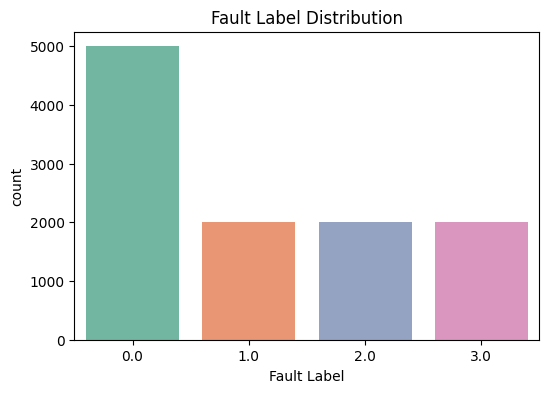


Training set size: (8800, 7)
Test set size: (2200, 7)

Data preprocessing completed successfully ✅


In [ ]:
# ==============================
# Step 1: Import libraries
# ==============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# ==============================
# Step 2: Load dataset
# ==============================
file_path = "/content/NEV_fault_dataset.csv"   # apna dataset path update karein
df = pd.read_csv(file_path)

print("Dataset loaded successfully ✅")
print("Shape of dataset:", df.shape)

# ==============================
# Step 3: Explore dataset
# ==============================
print("\nDataset Information:")
print(df.info())

print("\nMissing values in dataset:")
print(df.isnull().sum())

print("\nSummary Statistics:")
print(df.describe())

# ==============================
# Step 4: Fault Label distribution
# ==============================
plt.figure(figsize=(6, 4))
sns.countplot(x='Fault Label', hue='Fault Label', data=df, palette='Set2', legend=False)
plt.title("Fault Label Distribution")
plt.show()

# ==============================
# Step 5: Train-Test Split
# ==============================
X = df.drop(columns=['Fault Label'])
y = df['Fault Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining set size:", X_train.shape)
print("Test set size:", X_test.shape)

# ==============================
# Step 6: Scaling (Avoid leakage)
# ==============================
scaler = MinMaxScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using same scaler
X_test_scaled = scaler.transform(X_test)

print("\nData preprocessing completed successfully ✅")



Heatmap, Fault label graph

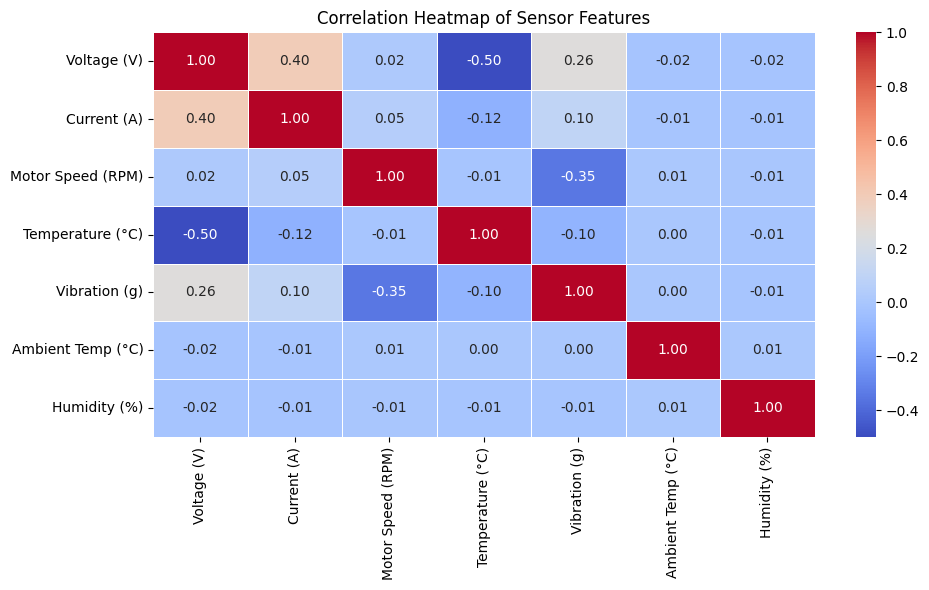

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# Correlation Heatmap
# ==============================
plt.figure(figsize=(10, 6))
corr = df.drop(columns=['Fault Label']).corr()  # exclude target column
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Sensor Features")
plt.tight_layout()
plt.show()




LR Code

In [ ]:
# ==============================

import pandas as pd
import warnings
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Ignore warnings
warnings.filterwarnings("ignore")

# Measure the start time
start_time = time.time()

# ------------------------------
# Load data
# ------------------------------
file_path = "/content/NEV_fault_dataset.csv"   # set your path
df = pd.read_csv(file_path)
df['Fault Label'] = df['Fault Label'].astype(int)

# Optional: quick check (uncomment if needed)
# print(df.info())
# print(df['Fault Label'].value_counts())

# ------------------------------
# Train / Test split (80/20), stratified
# ------------------------------
X = df.drop('Fault Label', axis=1)
y = df['Fault Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

# ------------------------------
# Fit scaler on training set only (avoid leakage)
# ------------------------------
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit on train only
X_test_scaled = scaler.transform(X_test)         # apply same transform to test

# ------------------------------
# 10-Fold Stratified CV on training set
# Use a pipeline so scaling is done internally for each fold (safe)
# ------------------------------
cv_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),               # ensures per-fold scaling in CV
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(cv_pipeline, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)

print(f'\n10-Fold CV Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation: {cv_scores.std():.4f}')

# ------------------------------
# Final training on the (scaled) training set and evaluate on held-out test set
# ------------------------------
final_model = LogisticRegression(max_iter=1000, random_state=42)
final_model.fit(X_train_scaled, y_train)

y_pred = final_model.predict(X_test_scaled)
y_proba = final_model.predict_proba(X_test_scaled) if hasattr(final_model, "predict_proba") else None

print(f'\nTest Accuracy LR model: {accuracy_score(y_test, y_pred):.4f}')
print(f'\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'\nClassification Report:\n{classification_report(y_test, y_pred, digits=4)}')



# Measure the end time
end_time = time.time()
runtime = end_time - start_time
print(f'\nComputation Runtime: {runtime:.4f} seconds')




Training set size: (8800, 7)
Test set size: (2200, 7)

10-Fold CV Accuracy Scores: [0.97613636 0.98068182 0.97613636 0.98295455 0.97954545 0.97159091
 0.98181818 0.97840909 0.97386364 0.96818182]
Mean CV Accuracy: 0.9769
Standard Deviation: 0.0045

Test Accuracy LR model: 0.9695

Confusion Matrix:
[[988   0  12   0]
 [  6 394   0   0]
 [  4   0 373  23]
 [  7   0  15 378]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9831    0.9880    0.9855      1000
           1     1.0000    0.9850    0.9924       400
           2     0.9325    0.9325    0.9325       400
           3     0.9426    0.9450    0.9438       400

    accuracy                         0.9695      2200
   macro avg     0.9646    0.9626    0.9636      2200
weighted avg     0.9696    0.9695    0.9696      2200


Computation Runtime: 3.3732 seconds


In [ ]:

import pandas as pd
import warnings
import time
import numpy as np

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Ignore warnings
warnings.filterwarnings("ignore")

# Measure the start time
start_time = time.time()

# ------------------------------
# Load data
# ------------------------------
file_path = "/content/NEV_fault_dataset.csv"   # set your path
df = pd.read_csv(file_path)
df['Fault Label'] = df['Fault Label'].astype(int)

# ------------------------------
# Train / Test split (80/20), stratified
# ------------------------------
X = df.drop('Fault Label', axis=1)
y = df['Fault Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

# ------------------------------
# Fit scaler on training set only (avoid leakage)
# ------------------------------
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit on train only
X_test_scaled = scaler.transform(X_test)         # apply same transform to test

# ------------------------------
# 10-Fold Stratified CV on training set
# Use a pipeline so scaling is done internally for each fold (safe)
# ------------------------------
cv_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', PassiveAggressiveClassifier(
        C=0.5,
        max_iter=1000,
        early_stopping=True,
        n_iter_no_change=5,
        random_state=0
    ))
])

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(cv_pipeline, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)

print(f'\n10-Fold CV Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation: {cv_scores.std():.4f}')

# ------------------------------
# Final training on the (scaled) training set and evaluate on held-out test set
# ------------------------------
final_model = PassiveAggressiveClassifier(
    C=0.5,
    max_iter=1000,
    early_stopping=True,
    n_iter_no_change=5,
    random_state=0
)

final_model.fit(X_train_scaled, y_train)

y_pred = final_model.predict(X_test_scaled)

print(f'\nTest Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'\nClassification Report:\n{classification_report(y_test, y_pred, digits=4)}')

# Measure the end time
end_time = time.time()
runtime = end_time - start_time
print(f'\nComputation Runtime: {runtime:.4f} seconds')



Training set size: (8800, 7)
Test set size: (2200, 7)

10-Fold CV Accuracy Scores: [0.96477273 0.94318182 0.95909091 0.96931818 0.975      0.96477273
 0.95681818 0.95454545 0.94431818 0.95227273]
Mean CV Accuracy: 0.9584
Standard Deviation: 0.0098

Test Accuracy: 0.9473

Confusion Matrix:
[[935   4  61   0]
 [  2 398   0   0]
 [  4   1 368  27]
 [  4   0  13 383]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9894    0.9350    0.9614      1000
           1     0.9876    0.9950    0.9913       400
           2     0.8326    0.9200    0.8741       400
           3     0.9341    0.9575    0.9457       400

    accuracy                         0.9473      2200
   macro avg     0.9359    0.9519    0.9431      2200
weighted avg     0.9505    0.9473    0.9481      2200


Computation Runtime: 0.9713 seconds


In [ ]:

import pandas as pd
import warnings
import time
import numpy as np

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Ignore warnings
warnings.filterwarnings("ignore")

# Measure the start time
start_time = time.time()

# ------------------------------
# Load data
# ------------------------------
file_path = "/content/NEV_fault_dataset.csv"   # set your path
df = pd.read_csv(file_path)
df['Fault Label'] = df['Fault Label'].astype(int)

# ------------------------------
# Train / Test split (80/20), stratified
# ------------------------------
X = df.drop('Fault Label', axis=1)
y = df['Fault Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

# ------------------------------
# Fit scaler on training set only (avoid leakage)
# ------------------------------
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit on train only
X_test_scaled = scaler.transform(X_test)         # apply same transform to test

# ------------------------------
# 10-Fold Stratified CV on training set
# ------------------------------
cv_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', RidgeClassifier(
        alpha=1.0,        # Regularization strength
        solver="auto",    # Automatically chooses best solver
        tol=1e-3,         # Stopping criteria tolerance
        random_state=42   # Ensures reproducibility
    ))
])

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(cv_pipeline, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)

print(f'\n10-Fold CV Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation: {cv_scores.std():.4f}')

# ------------------------------
# Final training on the (scaled) training set and evaluate on held-out test set
# ------------------------------
ridge_model = RidgeClassifier(
    alpha=1.0,
    solver="auto",
    tol=1e-3,
    random_state=42
)

ridge_model.fit(X_train_scaled, y_train)
y_pred = ridge_model.predict(X_test_scaled)

print(f'\nTest Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'\nClassification Report:\n{classification_report(y_test, y_pred, digits=4)}')

# Measure the end time
end_time = time.time()
runtime = end_time - start_time
print(f'\nComputation Runtime: {runtime:.4f} seconds')



Training set size: (8800, 7)
Test set size: (2200, 7)

10-Fold CV Accuracy Scores: [0.93977273 0.92272727 0.92159091 0.94659091 0.93295455 0.93295455
 0.94545455 0.93636364 0.93409091 0.92159091]
Mean CV Accuracy: 0.9334
Standard Deviation: 0.0087

Test Accuracy: 0.9305

Confusion Matrix:
[[985   1  14   0]
 [ 13 387   0   0]
 [ 36  12 308  44]
 [ 30   0   3 367]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9258    0.9850    0.9545      1000
           1     0.9675    0.9675    0.9675       400
           2     0.9477    0.7700    0.8497       400
           3     0.8929    0.9175    0.9051       400

    accuracy                         0.9305      2200
   macro avg     0.9335    0.9100    0.9192      2200
weighted avg     0.9314    0.9305    0.9288      2200


Computation Runtime: 0.1852 seconds


In [ ]:

import pandas as pd
import warnings
import time
import numpy as np

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Ignore warnings
warnings.filterwarnings("ignore")

# Measure the start time
start_time = time.time()

# ------------------------------
# Load data
# ------------------------------
file_path = "/content/NEV_fault_dataset.csv"   # set your dataset path
df = pd.read_csv(file_path)
df['Fault Label'] = df['Fault Label'].astype(int)

# ------------------------------
# Train / Test split (80/20), stratified
# ------------------------------
X = df.drop('Fault Label', axis=1)
y = df['Fault Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

# ------------------------------
# Fit scaler on training set only (avoid leakage)
# ------------------------------
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit on train only
X_test_scaled = scaler.transform(X_test)         # apply same transform to test

# ------------------------------
# 10-Fold Stratified CV on training set
# ------------------------------
cv_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', Perceptron(
        penalty="l2",     # L2 regularization for better generalization
        alpha=0.0001,     # Regularization strength
        max_iter=1000,    # Number of iterations for training
        tol=1e-3,         # Tolerance for stopping
        random_state=0
    ))
])

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(cv_pipeline, X_train, y_train, cv=kfold, scoring='accuracy', n_jobs=-1)

print(f'\n10-Fold CV Accuracy Scores: {cv_scores}')
print(f'Mean CV Accuracy: {cv_scores.mean():.4f}')
print(f'Standard Deviation: {cv_scores.std():.4f}')

# ------------------------------
# Final training on the (scaled) training set and evaluate on held-out test set
# ------------------------------
perceptron_model = Perceptron(
    penalty="l2",
    alpha=0.0001,
    max_iter=1000,
    tol=1e-3,
    random_state=0
)

perceptron_model.fit(X_train_scaled, y_train)
y_pred = perceptron_model.predict(X_test_scaled)

print(f'\nTest Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'\nConfusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
print(f'\nClassification Report:\n{classification_report(y_test, y_pred, digits=4)}')

# Measure the end time
end_time = time.time()
runtime = end_time - start_time
print(f'\nComputation Runtime: {runtime:.4f} seconds')



Training set size: (8800, 7)
Test set size: (2200, 7)

10-Fold CV Accuracy Scores: [0.95681818 0.89431818 0.86818182 0.8875     0.94886364 0.93409091
 0.95113636 0.93977273 0.95340909 0.89318182]
Mean CV Accuracy: 0.9227
Standard Deviation: 0.0315

Test Accuracy: 0.9236

Confusion Matrix:
[[983   7  10   0]
 [  5 395   0   0]
 [ 40  34 320   6]
 [ 35   4  27 334]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9247    0.9830    0.9530      1000
           1     0.8977    0.9875    0.9405       400
           2     0.8964    0.8000    0.8454       400
           3     0.9824    0.8350    0.9027       400

    accuracy                         0.9236      2200
   macro avg     0.9253    0.9014    0.9104      2200
weighted avg     0.9251    0.9236    0.9220      2200


Computation Runtime: 0.5329 seconds


In [ ]:
!pip install --upgrade tensorflow scikit-learn


Raw data shape: (11000, 7) (11000,)
Sequence dataset: (2199, 10, 7) (2199,)
Train sequences: (1759, 10, 7) Test sequences: (440, 10, 7)
Scaled shapes: (1759, 10, 7) (440, 10, 7)
Num classes: 4


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_12 (GRU)                    │ (None, 10, 128)        │        52,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_13 (GRU)                    │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,068 (359.64 KB)

 Trainable params: 92,068 (359.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.4569 - loss: 1.2219 - val_accuracy: 0.8477 - val_loss: 0.4617
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8929 - loss: 0.3421 - val_accuracy: 0.9636 - val_loss: 0.1239
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9544 - loss: 0.1365 - val_accuracy: 0.9705 - val_loss: 0.0791
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9691 - loss: 0.0905 - val_accuracy: 0.9682 - val_loss: 0.0749
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9768 - loss: 0.0715 - val_accuracy: 0.9705 - val_loss: 0.0703
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9807 - loss: 0.0594 - val_accuracy: 0.9727 - val_loss: 0.0708
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9828 - loss: 0.0515 - val_accuracy: 0.9727 - val_loss: 0.0677
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9821 - loss: 0.0425 - val_accuracy: 0.9659 - v

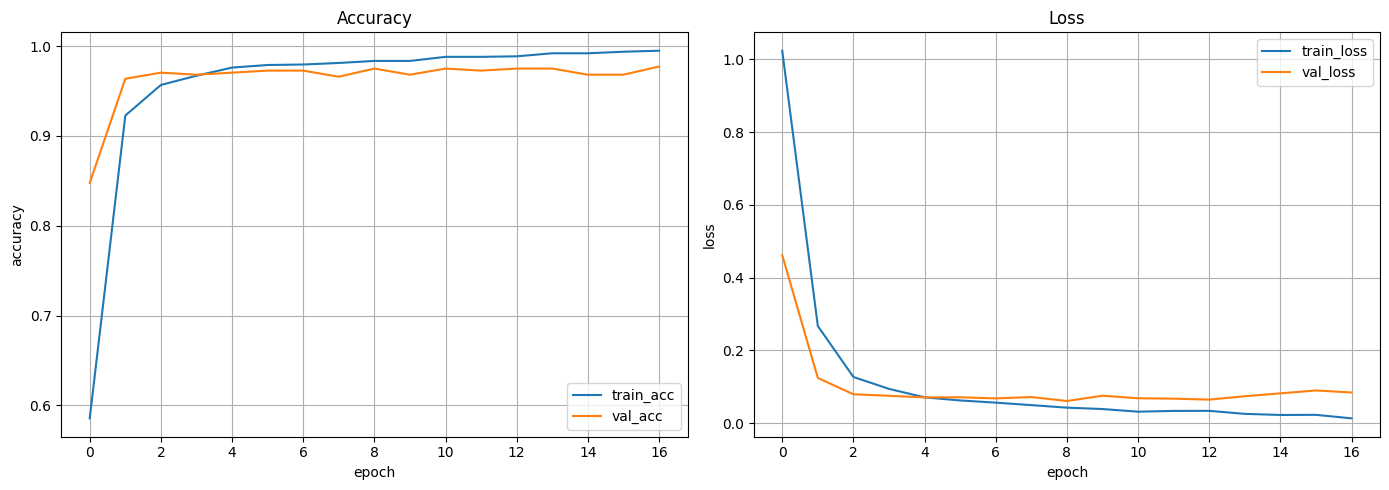


Total runtime: 189.78 seconds


In [ ]:

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold
import matplotlib.pyplot as plt
import warnings
import time
import random

warnings.filterwarnings("ignore")
start_time = time.time()
RANDOM_STATE = 42

# reproducibility
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)
random.seed(RANDOM_STATE)

# ------------------------------
# Load dataset
# ------------------------------
file_path = "/content/NEV_fault_dataset.csv"  # <-- update path
df = pd.read_csv(file_path)

# ------------------------------
# Raw features and labels
# ------------------------------
X_raw = df.drop(columns=['Fault Label']).values   # (n_samples, n_features)
y_raw = df['Fault Label'].values.astype(int)      # (n_samples,)

# ensure labels are 0..K-1
le = LabelEncoder()
y_raw = le.fit_transform(y_raw)

print("Raw data shape:", X_raw.shape, y_raw.shape)

# ------------------------------
# Sequence/window construction
# ------------------------------
def create_sequences(X, y, window_size=10, overlap=0.5, label_strategy='last'):
    """
    Build sliding windows from raw time-series data.
    - window_size: number of time steps per sequence
    - overlap: fraction in [0,1) of overlap between windows
    - label_strategy: 'last' (label = last timestep) or 'majority'
    Returns:
      X_seq: (n_windows, window_size, n_features)
      y_seq: (n_windows,)
    """
    if not (0 <= overlap < 1):
        raise ValueError("overlap must be in [0,1)")
    step = max(1, int(window_size * (1 - overlap)))
    Xs, ys = [], []
    n = X.shape[0]
    for start in range(0, n - window_size + 1, step):
        end = start + window_size
        Xs.append(X[start:end, :])
        if label_strategy == 'last':
            ys.append(y[end - 1])
        elif label_strategy == 'majority':
            vals, counts = np.unique(y[start:end], return_counts=True)
            ys.append(vals[np.argmax(counts)])
        else:
            raise ValueError("Unsupported label_strategy")
    return np.array(Xs), np.array(ys)

# PARAMETERS (tweak as needed)
WINDOW_SIZE = 10
OVERLAP = 0.5    # 50% overlap
TEST_SIZE = 0.2  # 80/20 split for final evaluation
EPOCHS = 50
BATCH_SIZE = 32

# Create sequences
X_seq, y_seq = create_sequences(X_raw, y_raw, window_size=WINDOW_SIZE, overlap=OVERLAP, label_strategy='last')
print("Sequence dataset:", X_seq.shape, y_seq.shape)  # (n_windows, timesteps, features)

# ------------------------------
# Train/Test split on sequences (stratified)
# ------------------------------
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(
    X_seq, y_seq, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y_seq, shuffle=True
)
print("Train sequences:", X_train_seq.shape, "Test sequences:", X_test_seq.shape)

# ------------------------------
# Preprocessing: fit scaler ONLY on training windows (flattened)
# ------------------------------
n_timesteps = X_train_seq.shape[1]
n_features = X_train_seq.shape[2]

scaler = StandardScaler().fit(X_train_seq.reshape(-1, n_features))
X_train_scaled = scaler.transform(X_train_seq.reshape(-1, n_features)).reshape(X_train_seq.shape)
X_test_scaled  = scaler.transform(X_test_seq.reshape(-1, n_features)).reshape(X_test_seq.shape)

print("Scaled shapes:", X_train_scaled.shape, X_test_scaled.shape)

# ------------------------------
# One-hot encode labels for multiclass
# ------------------------------
num_classes = len(np.unique(y_seq))
print("Num classes:", num_classes)
y_train_ohe = tf.keras.utils.to_categorical(y_train_seq, num_classes=num_classes)
y_test_ohe  = tf.keras.utils.to_categorical(y_test_seq, num_classes=num_classes)

# ------------------------------
# Build GRU model factory
# ------------------------------
def build_gru(input_shape, n_classes, lr=1e-3):
    model = Sequential([
        GRU(128, activation='tanh', return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        GRU(64, activation='tanh', return_sequences=False),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(n_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

input_shape = (WINDOW_SIZE, n_features)
model = build_gru(input_shape, num_classes)
model.summary()

# ------------------------------
# Train on training set and validate on test set
# ------------------------------
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train_ohe,
    validation_data=(X_test_scaled, y_test_ohe),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop],
    verbose=1
)

# ------------------------------
# Evaluation on held-out test sequences
# ------------------------------
y_pred_probs = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test_seq

print(f"\nTest Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred, digits=4))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))

# ------------------------------
# Optional: Stratified K-Fold CV on sequence dataset (preprocessing per fold)
# ------------------------------
print("\nRunning optional 5-fold stratified CV (per-fold scaling)...")
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
fold_acc = []
for fold, (train_idx, val_idx) in enumerate(kf.split(X_seq, y_seq), 1):
    print(f"\n--- Fold {fold} ---")
    X_tr, X_val = X_seq[train_idx], X_seq[val_idx]
    y_tr, y_val = y_seq[train_idx], y_seq[val_idx]

    # Fit scaler on fold training windows only
    scaler_k = StandardScaler().fit(X_tr.reshape(-1, n_features))
    X_tr_s = scaler_k.transform(X_tr.reshape(-1, n_features)).reshape(X_tr.shape)
    X_val_s = scaler_k.transform(X_val.reshape(-1, n_features)).reshape(X_val.shape)

    y_tr_o = tf.keras.utils.to_categorical(y_tr, num_classes=num_classes)
    y_val_o = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)

    model_k = build_gru(input_shape, num_classes)
    model_k.fit(X_tr_s, y_tr_o, epochs=20, batch_size=BATCH_SIZE, verbose=0)
    val_acc = model_k.evaluate(X_val_s, y_val_o, verbose=0)[1]
    fold_acc.append(val_acc)
    print(f"Fold {fold} validation accuracy: {val_acc:.4f}")

print(f"\nCV mean accuracy: {np.mean(fold_acc):.4f} ± {np.std(fold_acc):.4f}")

# ------------------------------
# Plot training curves
# ------------------------------
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.xlabel('epoch'); plt.ylabel('accuracy'); plt.legend(); plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('epoch'); plt.ylabel('loss'); plt.legend(); plt.grid(True)

plt.tight_layout()
plt.show()

# ------------------------------
# Runtime
# ------------------------------
end_time = time.time()
print(f"\nTotal runtime: {end_time - start_time:.2f} seconds")



Raw data shape: (11000, 7) (11000,)
X_seq shape: (2199, 10, 7)
y_seq shape: (2199,)
Train sequences: (1539, 10, 7) Test sequences: (660, 10, 7)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 10, 64)         │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 5, 128)         │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 5, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,292 (235.52 KB)

 Trainable params: 59,908 (234.02 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.3470 - loss: 1.7414 - val_accuracy: 0.4500 - val_loss: 1.3052
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6945 - loss: 0.7996 - val_accuracy: 0.5030 - val_loss: 1.2065
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8069 - loss: 0.5626 - val_accuracy: 0.5788 - val_loss: 1.0575
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8858 - loss: 0.3557 - val_accuracy: 0.6167 - val_loss: 0.9222
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9366 - loss: 0.2311 - val_accuracy: 0.6515 - val_loss: 0.8134
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9754 - loss: 0.1397 - val_accuracy: 0.6742 - val_loss: 0.7682
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9771 - loss: 0.0976 - val_accuracy: 0.6924 - val_loss: 0.7604
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9787 - loss: 0.0857 - val_accuracy: 0.6939 - val_los

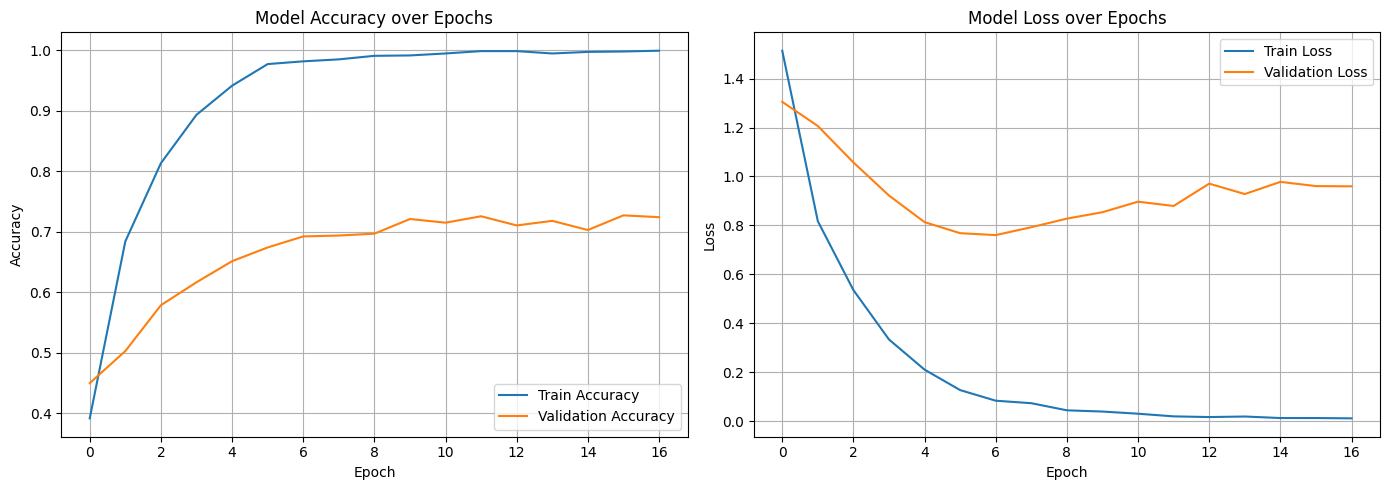


Performing 5-Fold Cross Validation to verify stability...
Fold 1: Accuracy = 0.7295
Fold 2: Accuracy = 0.7568
Fold 3: Accuracy = 0.7636
Fold 4: Accuracy = 0.7750
Fold 5: Accuracy = 0.7312

Average CV Accuracy: 0.7512 ± 0.0180

Total Computation Runtime: 62.03 seconds


In [ ]:

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold
import matplotlib.pyplot as plt
import random
import warnings
import time

# ------------------------------
# Setup
# ------------------------------
warnings.filterwarnings("ignore")
start_time = time.time()
RANDOM_STATE = 42

# Reproducibility
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)
random.seed(RANDOM_STATE)

# ------------------------------
# Load dataset
# ------------------------------
file_path = "/content/NEV_fault_dataset.csv"  # Update if needed
df = pd.read_csv(file_path)

# ------------------------------
# Features and labels
# ------------------------------
X_raw = df.drop('Fault Label', axis=1).values
y_raw = df['Fault Label'].values

# Encode labels (ensure 0,1,2,... format)
le = LabelEncoder()
y_raw = le.fit_transform(y_raw)

print("Raw data shape:", X_raw.shape, y_raw.shape)

# ------------------------------
# Sequence / window creation
# ------------------------------
def create_sequences(X, y, window_size=10, overlap=0.5, label_strategy='last'):
    """
    Construct sliding windows from continuous data.
    Each sequence = [window_size × features]
    Label assigned based on last or majority element.
    """
    if not (0 <= overlap < 1):
        raise ValueError("Overlap must be between 0 and 1.")
    step = int(window_size * (1 - overlap))
    if step <= 0:
        raise ValueError("Step size is zero; reduce overlap or increase window size.")

    Xs, ys = [], []
    for start in range(0, len(X) - window_size + 1, step):
        end = start + window_size
        Xs.append(X[start:end, :])
        if label_strategy == 'last':
            ys.append(y[end - 1])
        elif label_strategy == 'majority':
            vals, counts = np.unique(y[start:end], return_counts=True)
            ys.append(vals[np.argmax(counts)])
        else:
            raise ValueError("Unsupported label_strategy.")
    return np.array(Xs), np.array(ys)

# Parameters
WINDOW_SIZE = 10
OVERLAP = 0.5

X_seq, y_seq = create_sequences(X_raw, y_raw, window_size=WINDOW_SIZE, overlap=OVERLAP)
print("X_seq shape:", X_seq.shape)  # (n_sequences, timesteps, features)
print("y_seq shape:", y_seq.shape)

# ------------------------------
# Train-test split (stratified)
# ------------------------------
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(
    X_seq, y_seq, test_size=0.3, stratify=y_seq, random_state=RANDOM_STATE, shuffle=True
)
print("Train sequences:", X_train_seq.shape, "Test sequences:", X_test_seq.shape)

# ------------------------------
# Scale features (fit on train only)
# ------------------------------
n_timesteps = X_train_seq.shape[1]
n_features = X_train_seq.shape[2]

scaler = StandardScaler().fit(X_train_seq.reshape(-1, n_features))
X_train_scaled = scaler.transform(X_train_seq.reshape(-1, n_features)).reshape(X_train_seq.shape)
X_test_scaled = scaler.transform(X_test_seq.reshape(-1, n_features)).reshape(X_test_seq.shape)

# ------------------------------
# One-hot encode labels
# ------------------------------
num_classes = len(np.unique(y_raw))
y_train_ohe = tf.keras.utils.to_categorical(y_train_seq, num_classes=num_classes)
y_test_ohe = tf.keras.utils.to_categorical(y_test_seq, num_classes=num_classes)

# ------------------------------
# CNN model builder
# ------------------------------
def build_cnn(input_shape, n_classes, lr=1e-3):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),

        Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'),
        BatchNormalization(),
        MaxPooling1D(pool_size=2),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(n_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

input_shape = (WINDOW_SIZE, n_features)
cnn_model = build_cnn(input_shape, num_classes)
cnn_model.summary()

# ------------------------------
# Train CNN
# ------------------------------
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = cnn_model.fit(
    X_train_scaled, y_train_ohe,
    validation_data=(X_test_scaled, y_test_ohe),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# ------------------------------
# Evaluate model
# ------------------------------
y_pred_prob = cnn_model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = y_test_seq

print(f"\nTest Accuracy: {accuracy_score(y_true, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_true, y_pred, digits=4))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))

# ------------------------------
# Plot training performance
# ------------------------------
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------
# Optional: 5-fold cross-validation for reviewer
# ------------------------------
print("\nPerforming 5-Fold Cross Validation to verify stability...")
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
fold_accuracies = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_seq, y_seq)):
    X_train_kf, X_val_kf = X_seq[train_idx], X_seq[val_idx]
    y_train_kf, y_val_kf = y_seq[train_idx], y_seq[val_idx]

    # Scale per fold
    scaler_kf = StandardScaler().fit(X_train_kf.reshape(-1, n_features))
    X_train_kf = scaler_kf.transform(X_train_kf.reshape(-1, n_features)).reshape(X_train_kf.shape)
    X_val_kf = scaler_kf.transform(X_val_kf.reshape(-1, n_features)).reshape(X_val_kf.shape)

    y_train_kf = tf.keras.utils.to_categorical(y_train_kf, num_classes=num_classes)
    y_val_kf = tf.keras.utils.to_categorical(y_val_kf, num_classes=num_classes)

    model_kf = build_cnn(input_shape, num_classes)
    model_kf.fit(X_train_kf, y_train_kf, epochs=20, batch_size=32, verbose=0)
    val_acc = model_kf.evaluate(X_val_kf, y_val_kf, verbose=0)[1]
    fold_accuracies.append(val_acc)
    print(f"Fold {fold+1}: Accuracy = {val_acc:.4f}")

print(f"\nAverage CV Accuracy: {np.mean(fold_accuracies):.4f} ± {np.std(fold_accuracies):.4f}")

# ------------------------------
# Runtime
# ------------------------------
end_time = time.time()
print(f"\nTotal Computation Runtime: {end_time - start_time:.2f} seconds")



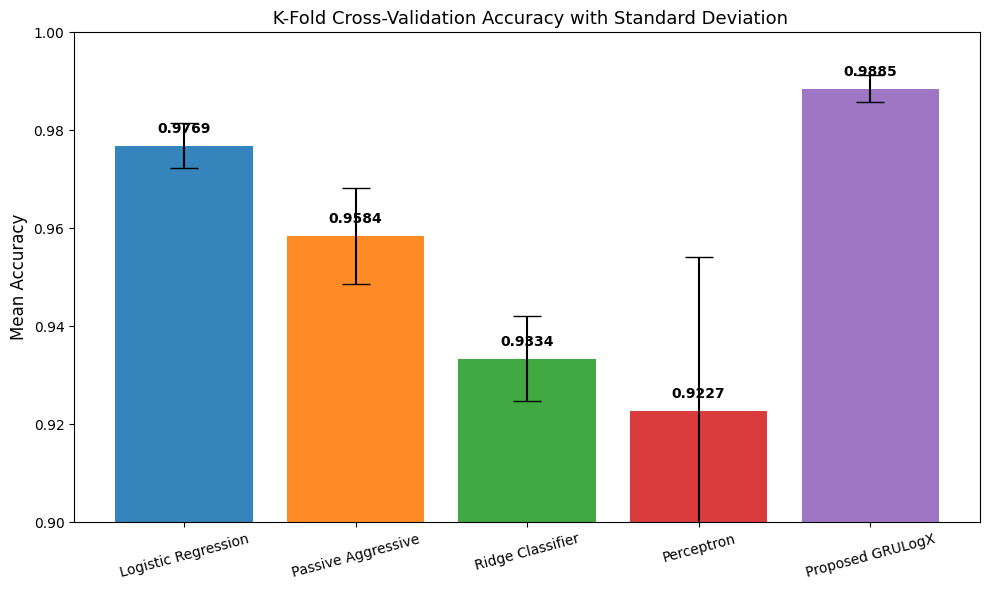

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Models and their scores
models = [
    'Logistic Regression',
    'Passive Aggressive',
    'Ridge Classifier',
    'Perceptron',
    'Proposed GRULogX'
]

# Mean accuracies and standard deviations (from reported results)
mean_accuracies = [0.9769, 0.9584, 0.9334, 0.9227, 0.9885]
std_devs = [0.0045, 0.0098, 0.0087, 0.0315, 0.0028]

# Use a better color palette (color-blind friendly)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, mean_accuracies, yerr=std_devs, capsize=10, color=colors, alpha=0.9)

# Labels and title
plt.ylabel('Mean Accuracy', fontsize=12)
plt.title(' K-Fold Cross-Validation Accuracy with Standard Deviation', fontsize=13)
plt.ylim(0.9, 1.0)

# Annotate each bar with accuracy values
for bar, acc in zip(bars, mean_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2.0, acc + 0.002, f'{acc:.4f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Clean look – no grid lines
plt.xticks(rotation=15)
plt.tight_layout()

# Show the plot
plt.show()





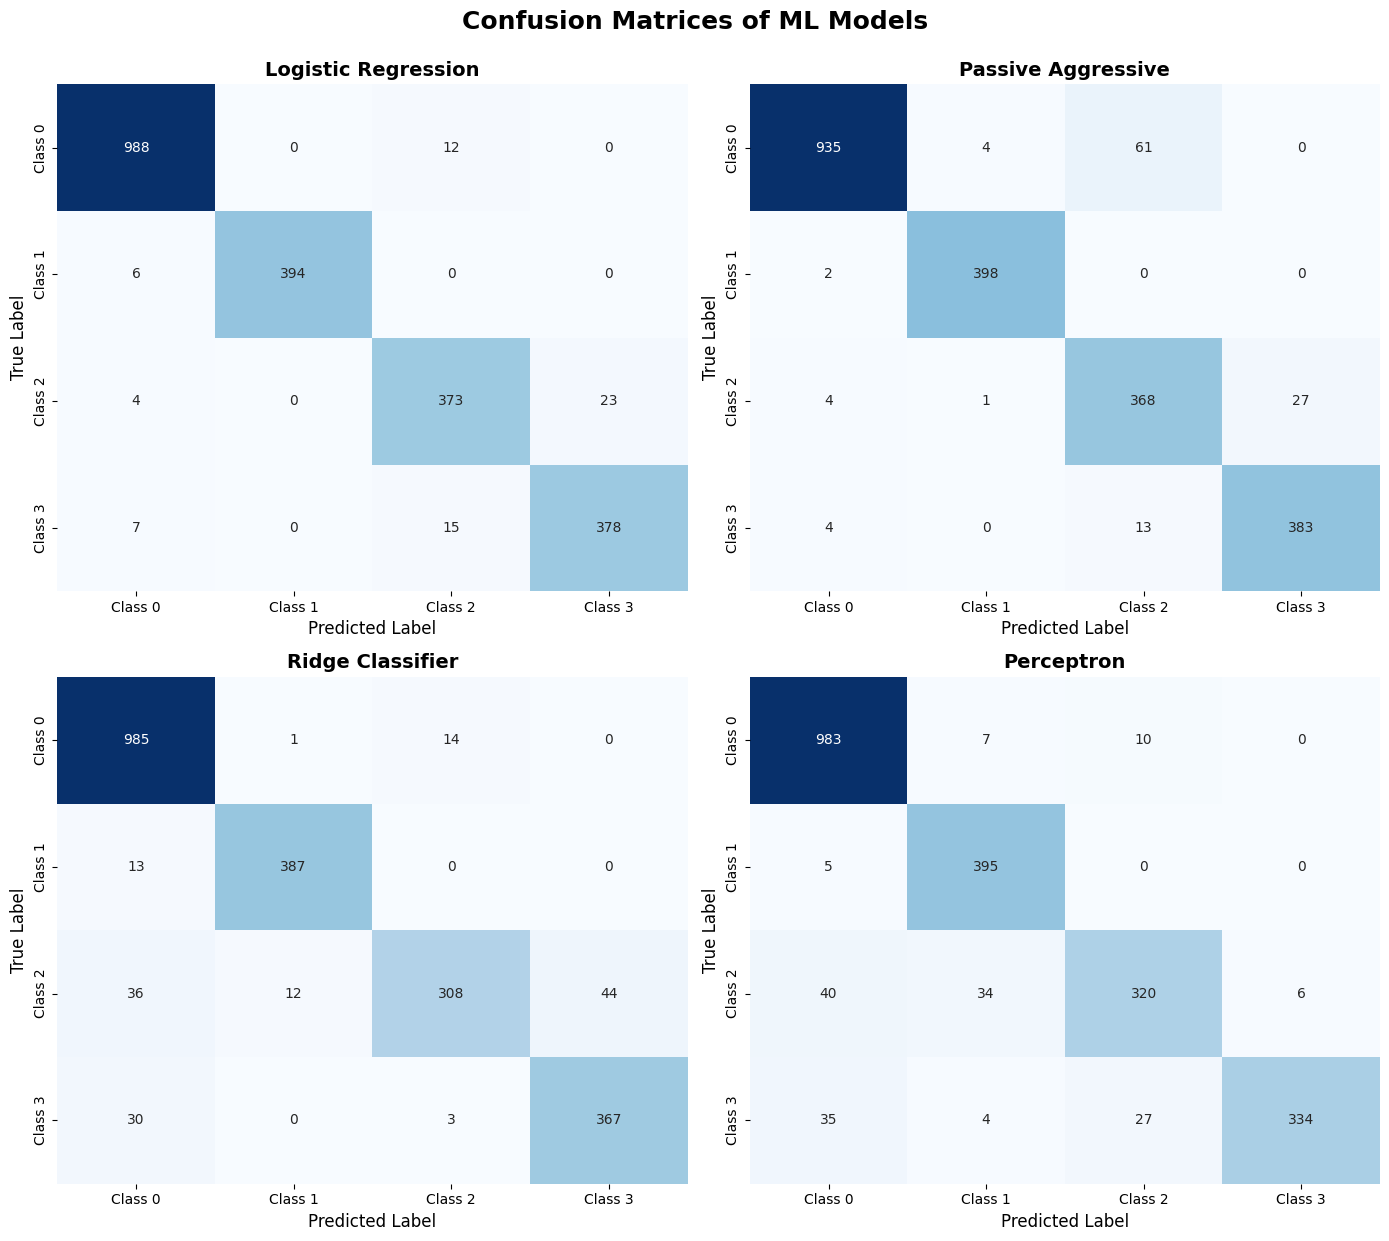

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ---------------------------------------------
# Confusion Matrices for 4 ML Models (from actual results)
# ---------------------------------------------
conf_matrices = {
    "Logistic Regression": np.array([
        [988, 0, 12, 0],
        [6, 394, 0, 0],
        [4, 0, 373, 23],
        [7, 0, 15, 378]
    ]),
    "Passive Aggressive": np.array([
        [935, 4, 61, 0],
        [2, 398, 0, 0],
        [4, 1, 368, 27],
        [4, 0, 13, 383]
    ]),
    "Ridge Classifier": np.array([
        [985, 1, 14, 0],
        [13, 387, 0, 0],
        [36, 12, 308, 44],
        [30, 0, 3, 367]
    ]),
    "Perceptron": np.array([
        [983, 7, 10, 0],
        [5, 395, 0, 0],
        [40, 34, 320, 6],
        [35, 4, 27, 334]
    ])
}

class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

# ---------------------------------------------
# Plot Confusion Matrices
# ---------------------------------------------
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

for ax, (title, cm) in zip(axs.ravel(), conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=class_names, yticklabels=class_names, cbar=False)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.suptitle("Confusion Matrices of ML Models", fontsize=18, fontweight='bold', y=1.03)
plt.show()


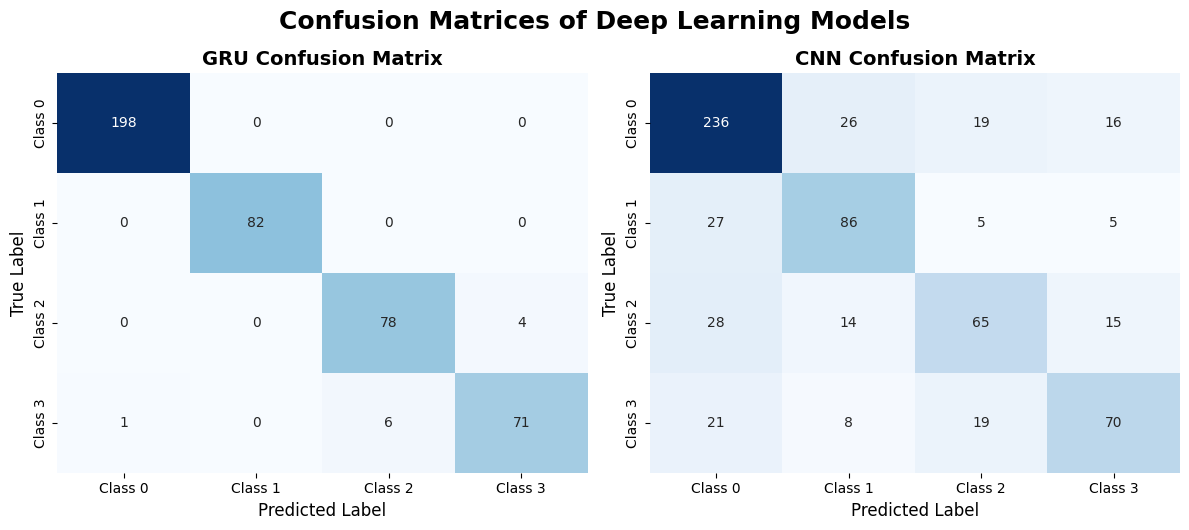

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------------------------
# Confusion Matrices for Deep Learning Models
# ---------------------------------------------
conf_matrices = {
    "GRU": np.array([
        [198, 0, 0, 0],
        [0, 82, 0, 0],
        [0, 0, 78, 4],
        [1, 0, 6, 71]
    ]),
    "CNN": np.array([
        [236, 26, 19, 16],
        [27, 86, 5, 5],
        [28, 14, 65, 15],
        [21, 8, 19, 70]
    ])
}

# Class labels
class_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']

# ---------------------------------------------
# Plot Confusion Matrices Side-by-Side
# ---------------------------------------------
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for ax, (title, cm) in zip(axs, conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=class_names, yticklabels=class_names, cbar=False)
    ax.set_title(f"{title} Confusion Matrix", fontsize=14, fontweight='bold')
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)
    ax.tick_params(axis='both', labelsize=10)

plt.tight_layout()
plt.suptitle("Confusion Matrices of Deep Learning Models", fontsize=18, fontweight='bold', y=1.05)
plt.show()



Starting 5-Fold Stratified Cross Validation

Fold 1/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Fold 1 Accuracy: 0.9877

Fold 2/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Fold 2 Accuracy: 0.9905

Fold 3/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Fold 3 Accuracy: 0.9859

Fold 4/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Fold 4 Accuracy: 0.9855

Fold 5/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Fold 5 Accuracy: 0.9927

=== GRULogX Cross-Validation Results ===
Mean Accuracy: 0.9885
Standard Deviation: 0.0028
Total Computation Runtime: 368.91 seconds



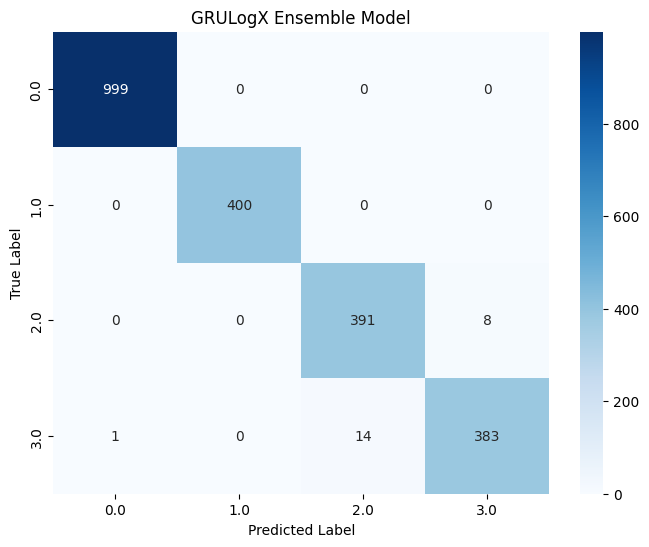


Confusion Matrix for last fold:
[[1000    0    0    0]
 [   0  400    0    0]
 [   0    0  394    6]
 [   4    0    6  390]]

Classification Report for last fold:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00       400
           2       0.98      0.98      0.98       400
           3       0.98      0.97      0.98       400

    accuracy                           0.99      2200
   macro avg       0.99      0.99      0.99      2200
weighted avg       0.99      0.99      0.99      2200



In [ ]:
# ==============================
# Proposed GRULogX Ensemble Model
# ==============================
import numpy as np
import pandas as pd
import time
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

warnings.filterwarnings("ignore")

# ------------------------------
# Load dataset
# ------------------------------
file_path = "/content/NEV_fault_dataset.csv"
df = pd.read_csv(file_path)

# Prepare features and labels
X = df.drop('Fault Label', axis=1)
y = df['Fault Label']

# Encode labels
le = LabelEncoder()
y_enc = le.fit_transform(y)

num_classes = len(np.unique(y_enc))
if num_classes > 2:
    y_categorical = tf.keras.utils.to_categorical(y_enc, num_classes)
else:
    y_categorical = y_enc

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Parameters
n_splits = 5
EPOCHS = 50
BATCH_SIZE = 32
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

accuracies = []
conf_sum = np.zeros((num_classes, num_classes), dtype=int)
classification_reports = []

# Ensemble prediction function
def ensemble_predict(lr_probs, gru_probs):
    avg_probs = (lr_probs + gru_probs) / 2
    return np.argmax(avg_probs, axis=1)

print("Starting 5-Fold Stratified Cross Validation\n")

start_time_total = time.time()

for fold, (train_index, test_index) in enumerate(skf.split(X_scaled, y_enc), 1):
    print(f"Fold {fold}/{n_splits}")

    # Split data
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train_enc, y_test_enc = y_enc[train_index], y_enc[test_index]

    if num_classes > 2:
        y_train_cat = tf.keras.utils.to_categorical(y_train_enc, num_classes)
        y_test_cat = tf.keras.utils.to_categorical(y_test_enc, num_classes)
    else:
        y_train_cat = y_train_enc
        y_test_cat = y_test_enc

    # Logistic Regression
    lr_model = LogisticRegression(random_state=0, max_iter=1000)
    lr_model.fit(X_train, y_train_enc)
    lr_probs = lr_model.predict_proba(X_test)

    # GRU Model (updated hyperparameters)
    X_train_gru = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test_gru = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    gru_model = Sequential([
        GRU(128, activation='tanh', return_sequences=True, input_shape=(1, X_train.shape[1])),
        Dropout(0.2),
        GRU(64, activation='tanh', return_sequences=False),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax' if num_classes > 2 else 'sigmoid')
    ])

    gru_model.compile(optimizer=Adam(learning_rate=0.001),
                      loss='categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy',
                      metrics=['accuracy'])

    gru_model.fit(X_train_gru, y_train_cat, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
    gru_probs = gru_model.predict(X_test_gru)

    # Ensemble
    y_pred_ensemble = ensemble_predict(lr_probs, gru_probs)

    # Metrics
    acc = accuracy_score(y_test_enc, y_pred_ensemble)
    accuracies.append(acc)

    cm = confusion_matrix(y_test_enc, y_pred_ensemble)
    conf_sum += cm

    cr = classification_report(y_test_enc, y_pred_ensemble, output_dict=True)
    classification_reports.append(cr)

    last_y_test_enc = y_test_enc
    last_y_pred_ensemble = y_pred_ensemble

    print(f"Fold {fold} Accuracy: {acc:.4f}\n")

end_time_total = time.time()
runtime_total = end_time_total - start_time_total

# Average confusion matrix
conf_avg = conf_sum // n_splits

# Average accuracy and std
mean_acc = np.mean(accuracies)
std_acc = np.std(accuracies)

print("=== GRULogX Cross-Validation Results ===")
print(f"Mean Accuracy: {mean_acc:.4f}")
print(f"Standard Deviation: {std_acc:.4f}")
print(f"Total Computation Runtime: {runtime_total:.2f} seconds\n")

# Plot average confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_avg, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('GRULogX Ensemble Model')
plt.show()

# Print confusion matrix and classification report for last fold
print("\nConfusion Matrix for last fold:")
print(confusion_matrix(last_y_test_enc, last_y_pred_ensemble))

print("\nClassification Report for last fold:")
print(classification_report(last_y_test_enc, last_y_pred_ensemble))


Classes: [0. 1. 2. 3.], Num classes: 4
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

Ensemble AUC results:
  Class 0.0 AUC: 0.9999
  Class 1.0 AUC: 1.0000
  Class 2.0 AUC: 0.9979
  Class 3.0 AUC: 0.9986
  Micro AUC: 0.9994
  Macro AUC: 0.9991
  Weighted AUC: 0.9993


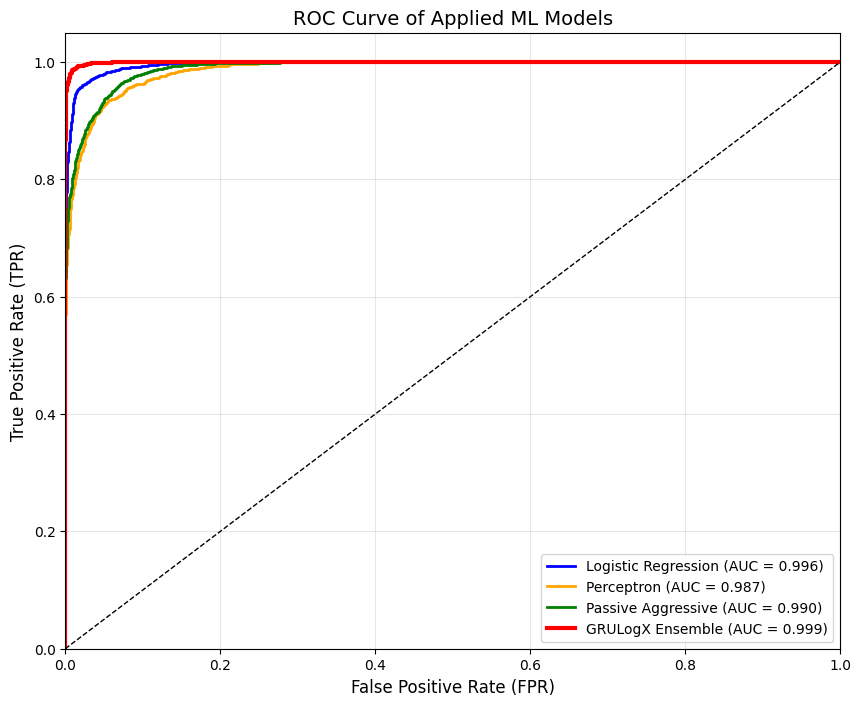

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import random
from sklearn.linear_model import LogisticRegression, Perceptron, PassiveAggressiveClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

warnings.filterwarnings("ignore")
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)
random.seed(RANDOM_STATE)

# --------------------------
# Settings
# --------------------------
file_path = "/content/NEV_fault_dataset.csv"   # <-- update path if needed
EPOCHS = 50
BATCH_SIZE = 32
TEST_SIZE = 0.2

# --------------------------
# Load dataset
# --------------------------
df = pd.read_csv(file_path)
X = df.drop('Fault Label', axis=1).values
y_raw = df['Fault Label'].values

# --------------------------
# Encode labels
# --------------------------
le = LabelEncoder()
y = le.fit_transform(y_raw)           # 0..K-1
classes = le.classes_
num_classes = len(np.unique(y))
print(f"Classes: {classes}, Num classes: {num_classes}")

# --------------------------
# Train/test split
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
)

# One-hot for GRU
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)  # may be unused except for sanity

# Binarize test labels for multiclass ROC/AUC computations
y_test_bin = label_binarize(y_test, classes=np.arange(num_classes))

# --------------------------
# Train classical models
# --------------------------
lr_model = LogisticRegression(max_iter=2000, random_state=RANDOM_STATE, multi_class='ovr', solver='liblinear')
perc_model = Perceptron(max_iter=1000, random_state=RANDOM_STATE)
pa_model = PassiveAggressiveClassifier(max_iter=1000, random_state=RANDOM_STATE)

lr_model.fit(X_train, y_train)
perc_model.fit(X_train, y_train)
pa_model.fit(X_train, y_train)

# Probabilities / scores
lr_probs = lr_model.predict_proba(X_test)            # (n_samples, n_classes) for multiclass
perc_scores = perc_model.decision_function(X_test)   # shape may vary
pa_scores = pa_model.decision_function(X_test)

# Ensure 2D score matrix for binary case
def ensure_score_matrix(scores):
    scores = np.asarray(scores)
    if scores.ndim == 1:
        # convert to two-column pseudo-probabilities/scores
        scores = np.vstack([1 - scores, scores]).T
    return scores

perc_scores = ensure_score_matrix(perc_scores)
pa_scores = ensure_score_matrix(pa_scores)

# If linear models do not provide class-wise scores/probabilities for multiclass,
# perc_scores/pa_scores should be shape (n_samples, n_classes). If not, ensure_score_matrix handled binary case.

# --------------------------
# GRU model
# --------------------------
X_train_gru = np.expand_dims(X_train, axis=1)   # (n_samples, 1, n_features)
X_test_gru  = np.expand_dims(X_test, axis=1)

gru_model = Sequential([
    GRU(128, activation='tanh', return_sequences=True, input_shape=(1, X_train.shape[1])),
    Dropout(0.2),
    GRU(64, activation='tanh', return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

gru_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

gru_model.fit(X_train_gru, y_train_cat, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
gru_probs = gru_model.predict(X_test_gru)   # (n_samples, n_classes)

# --------------------------
# GRULogX ensemble (simple average of probs)
# --------------------------
ensemble_probs = (lr_probs + gru_probs) / 2.0

# --------------------------
# Compute multiclass AUCs for ensemble (per-class, micro, macro, weighted)
# --------------------------
from sklearn.metrics import roc_curve, auc, roc_auc_score

def compute_multiclass_auc(y_true, pred_probs):
    """
    y_true: 1D integer labels (0..C-1)
    pred_probs: (n_samples, n_classes) probability outputs
    returns dict with per-class AUCs and micro/macro/weighted AUCs
    """
    n_classes = pred_probs.shape[1]
    y_bin = label_binarize(y_true, classes=np.arange(n_classes))
    per_class_auc = {}
    for i in range(n_classes):
        fpr_i, tpr_i, _ = roc_curve(y_bin[:, i], pred_probs[:, i])
        per_class_auc[i] = auc(fpr_i, tpr_i)
    micro_auc = roc_auc_score(y_bin, pred_probs, average='micro', multi_class='ovr')
    macro_auc = roc_auc_score(y_bin, pred_probs, average='macro', multi_class='ovr')
    weighted_auc = roc_auc_score(y_bin, pred_probs, average='weighted', multi_class='ovr')
    return {
        'per_class_auc': per_class_auc,
        'micro_auc': micro_auc,
        'macro_auc': macro_auc,
        'weighted_auc': weighted_auc
    }

ensemble_auc_results = compute_multiclass_auc(y_test, ensemble_probs)

print("\nEnsemble AUC results:")
for i in range(num_classes):
    print(f"  Class {classes[i]} AUC: {ensemble_auc_results['per_class_auc'][i]:.4f}")
print(f"  Micro AUC: {ensemble_auc_results['micro_auc']:.4f}")
print(f"  Macro AUC: {ensemble_auc_results['macro_auc']:.4f}")
print(f"  Weighted AUC: {ensemble_auc_results['weighted_auc']:.4f}")

# --------------------------
# Plot ROC curves for each model (micro-style: flatten probabilities)
# We plot one ROC curve per model by computing roc_curve on flattened arrays.
# --------------------------
plt.figure(figsize=(10, 8))

def plot_model_micro_roc(y_test_bin, model_probs, label_name, color, lw=2):
    # Flattened (micro) ROC: treat all classes together
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), model_probs.ravel())
    r_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=lw, label=f"{label_name} (AUC = {r_auc:.3f})")
    return fpr, tpr, r_auc

# colors
colors = {'Logistic Regression':'blue', 'Perceptron':'orange', 'Passive Aggressive':'green',
          'GRU':'purple', 'GRULogX Ensemble':'red'}

plot_model_micro_roc(y_test_bin, lr_probs, 'Logistic Regression', colors['Logistic Regression'])
plot_model_micro_roc(y_test_bin, perc_scores, 'Perceptron', colors['Perceptron'])
plot_model_micro_roc(y_test_bin, pa_scores, 'Passive Aggressive', colors['Passive Aggressive'])

plot_model_micro_roc(y_test_bin, ensemble_probs, 'GRULogX Ensemble', colors['GRULogX Ensemble'], lw=3)

# formatting
plt.plot([0,1],[0,1], 'k--', lw=1)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curve of Applied ML Models', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)



plt.show()


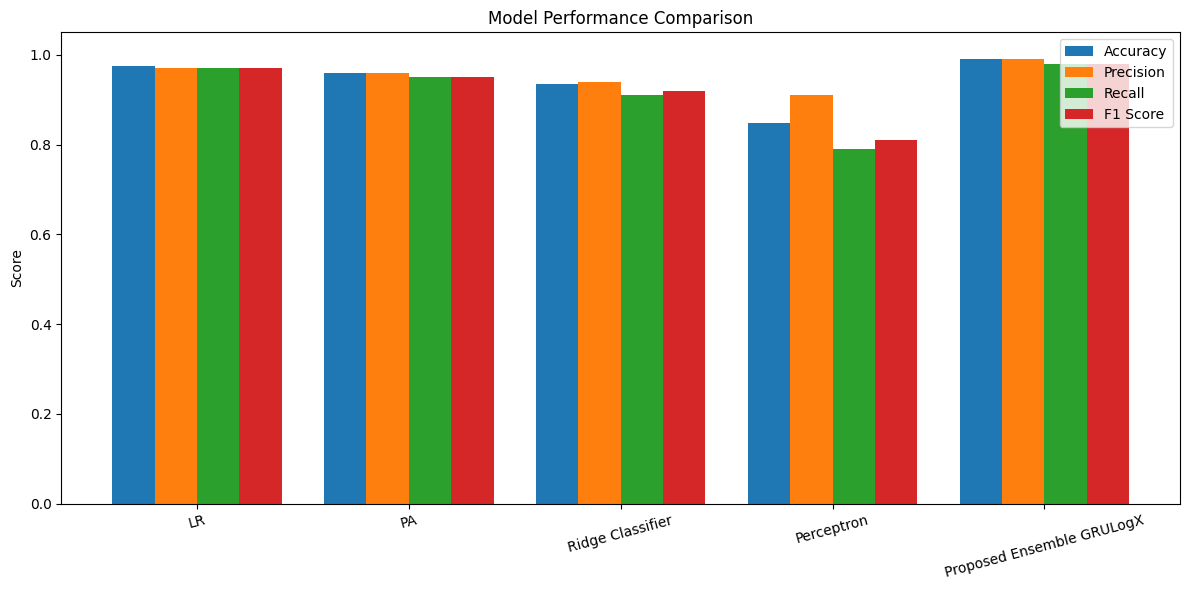

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ----- Graph 3: Model Performance (Accuracy, Precision, Recall, F1) -----
models_perf = ['LR', 'PA', 'Ridge Classifier', 'Perceptron', 'Proposed Ensemble GRULogX']

accuracy = [0.9752, 0.9600, 0.9355, 0.8473, 0.99]
precision = [0.97, 0.96, 0.94, 0.91, 0.99]
recall = [0.97, 0.95, 0.91, 0.79, 0.98]
f1 = [0.97, 0.95, 0.92, 0.81, 0.98]

x = np.arange(len(models_perf))
width = 0.2

plt.figure(figsize=(12, 6))
plt.bar(x - 1.5*width, accuracy, width, label='Accuracy')
plt.bar(x - 0.5*width, precision, width, label='Precision')
plt.bar(x + 0.5*width, recall, width, label='Recall')
plt.bar(x + 1.5*width, f1, width, label='F1 Score')

plt.xticks(x, models_perf, rotation=15)
plt.ylim(0, 1.05)
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.legend()

# ✅ Remove all grid lines
plt.grid(False)

plt.tight_layout()
plt.show()


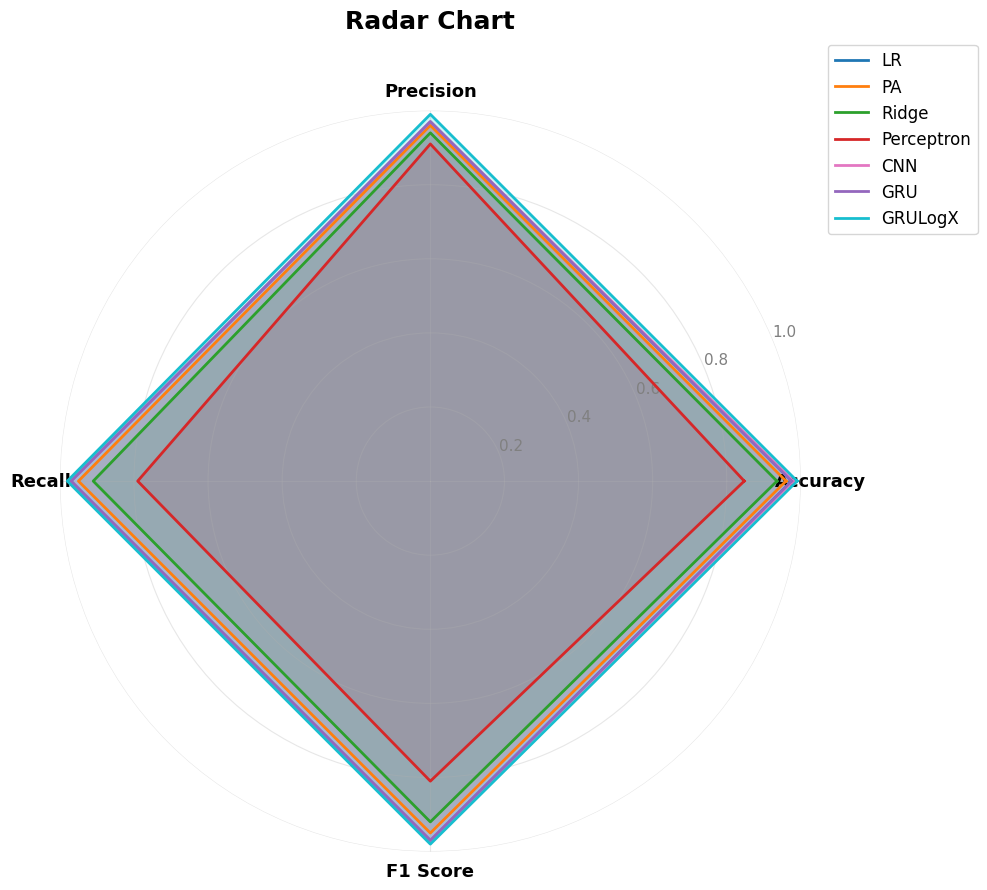

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ----- Metric Categories -----
categories = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
N = len(categories)

# ----- Model Performance Data -----
data = {
    'LR':         [0.9752, 0.97, 0.97, 0.97],
    'PA':         [0.9600, 0.96, 0.95, 0.95],
    'Ridge':      [0.9355, 0.94, 0.91, 0.92],
    'Perceptron': [0.8473, 0.91, 0.79, 0.81],
    'CNN':        [0.98, 0.97, 0.97, 0.97],
    'GRU':        [0.9750, 0.97, 0.97, 0.97],
    'GRULogX':    [0.99, 0.99, 0.98, 0.98]
}

# ----- Convert to DataFrame -----
df = pd.DataFrame(data, index=categories)

# ----- Radar Chart Setup -----
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # Close the loop

# ----- Color Palette -----
colors = {
    'LR': '#1f77b4',
    'PA': '#ff7f0e',
    'Ridge': '#2ca02c',
    'Perceptron': '#d62728',
    'CNN': '#e377c2',
    'GRU': '#9467bd',
    'GRULogX': '#17becf'
}

# ----- Plot Configuration -----
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)
plt.title('Radar Chart', size=18, y=1.1, weight='bold')

# ----- Plot Each Model -----
for model, scores in df.items():
    values = scores.tolist()
    values += values[:1]  # Close the loop
    ax.plot(angles, values, color=colors[model], linewidth=2, label=model)
    ax.fill(angles, values, color=colors[model], alpha=0.2)

# ----- Customize Axes -----
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=13, fontweight='bold')
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], fontsize=11, color='gray')
ax.set_ylim(0, 1)

# ----- Add Legend -----
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.1), fontsize=12)

# ----- Final Touches -----
ax.spines['polar'].set_visible(False)  # remove circular border
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

